# Ejercicio 1
  
Fichero autos.csv. 

Generar una función y utilizar esta para recodificar la variable “país.
de origen” (1, 2, 3) en el dataframe a través de la función apply.  

In [ ]:
# subir archivo
from google.colab import files

uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving autos.csv to autos.csv
User uploaded file "autos.csv" with length 22621 bytes


In [ ]:
import pandas as pd
# Creo el DF usando pandas y la funcion read_csv
df = pd.read_csv('autos.csv', delimiter=';')
df

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza
0,18.0,8,USA,3504,307.0,12.0,chevrolet chevelle malibu,1/01/1970,130.0
1,15.0,8,USA,3693,350.0,11.5,buick skylark 320,1/01/1970,165.0
2,18.0,8,USA,3436,318.0,11.0,plymouth satellite,1/01/1970,150.0
3,16.0,8,USA,3433,304.0,12.0,amc rebel sst,1/01/1970,150.0
4,17.0,8,USA,3449,302.0,10.5,ford torino,1/01/1970,140.0
...,...,...,...,...,...,...,...,...,...
401,27.0,4,USA,2790,140.0,15.6,ford mustang gl,1/01/1982,86.0
402,44.0,4,Europe,2130,97.0,24.6,vw pickup,1/01/1982,52.0
403,32.0,4,USA,2295,135.0,11.6,dodge rampage,1/01/1982,84.0
404,28.0,4,USA,2625,120.0,18.6,ford ranger,1/01/1982,79.0


In [ ]:
# Cuento los valores que existen en la columna Pais_Origen
df['Pais_Origen'].value_counts()

USA       254
Japan      79
Europe     73
Name: Pais_Origen, dtype: int64

In [ ]:
# Creo funcion que va a modificar la columna Pais_Origen, cambiando nombre por numero
def recodificar_pais_origen(column):
  column_changed = column.apply(lambda x: 1 if x == 'USA' else (2 if x == 'Japan' else 3))
  return column_changed

In [ ]:
# Ejecuto la modificacion, llamando a la funcion anterior
df['Pais_Origen'] = recodificar_pais_origen(df['Pais_Origen'])
df

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza
0,18.0,8,1,3504,307.0,12.0,chevrolet chevelle malibu,1/01/1970,130.0
1,15.0,8,1,3693,350.0,11.5,buick skylark 320,1/01/1970,165.0
2,18.0,8,1,3436,318.0,11.0,plymouth satellite,1/01/1970,150.0
3,16.0,8,1,3433,304.0,12.0,amc rebel sst,1/01/1970,150.0
4,17.0,8,1,3449,302.0,10.5,ford torino,1/01/1970,140.0
...,...,...,...,...,...,...,...,...,...
401,27.0,4,1,2790,140.0,15.6,ford mustang gl,1/01/1982,86.0
402,44.0,4,3,2130,97.0,24.6,vw pickup,1/01/1982,52.0
403,32.0,4,1,2295,135.0,11.6,dodge rampage,1/01/1982,84.0
404,28.0,4,1,2625,120.0,18.6,ford ranger,1/01/1982,79.0


In [ ]:
# Vuelvo a verificar que estan los mismos valores que antes
df['Pais_Origen'].value_counts()

1    254
2     79
3     73
Name: Pais_Origen, dtype: int64

# Ejercicio 2
  
Generar un Notebook Colab con código y resultados, con el siguiente fichero autos.csv que contiene información de autos de un periodo de tiempo. Resolver los siguientes:
- Limpieza y tratamiento de las variables (Según corresponda)
- Generar 5 nuevas variables aplicando los siguientes criterios
con las variables numéricas:
 
 Log10(var1/var2)  
 Sqrt(var1) * exp(var2)/200  

 Si var 1 > var 2 → 5, caso contrario 3 1/logn(var1/var2)*100
 var2**2/var1

Generar 3 variables cualitativas ordinales con los siguientes criterios:

Si es mayor a la “media + 1*desviación estándar” → Alto
Si está entre “media - 1*desviación estándar” y “media + 1*desviación estándar” → Medio
Si es menor a la “media - 1*desviación estándar” → Bajo

Nota: Mostrar con las nuevas variables generadas. Elegir con libertad las variables a trabajar.

- Crear una función que muestre los siguientes gráficos para las variables numéricas según una variable cualitativa:
 Cajas y bigotes   
 Barras de la media   
 Histograma con Curva. 
- Crear una función que devuelva un mapa de calor con la correlación de todas las variables numéricas (incluye las generadas), para cada país.  


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

df.head()

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza
0,18.0,8,1,3504,307.0,12.0,chevrolet chevelle malibu,1/01/1970,130.0
1,15.0,8,1,3693,350.0,11.5,buick skylark 320,1/01/1970,165.0
2,18.0,8,1,3436,318.0,11.0,plymouth satellite,1/01/1970,150.0
3,16.0,8,1,3433,304.0,12.0,amc rebel sst,1/01/1970,150.0
4,17.0,8,1,3449,302.0,10.5,ford torino,1/01/1970,140.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Millas_Por_Galon   398 non-null    float64
 1   Cilindros          406 non-null    int64  
 2   Pais_Origen        406 non-null    int64  
 3   Peso_En_Libras     406 non-null    int64  
 4   Desplazamiento     406 non-null    float64
 5   Aceleracion        406 non-null    float64
 6   Nombre             406 non-null    object 
 7   Anyo               406 non-null    object 
 8   Caballo_De_Fuerza  400 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 28.7+ KB


In [ ]:
# chequeo los datos nulos
df.isnull().sum()

Millas_Por_Galon     8
Cilindros            0
Pais_Origen          0
Peso_En_Libras       0
Desplazamiento       0
Aceleracion          0
Nombre               0
Anyo                 0
Caballo_De_Fuerza    6
dtype: int64

In [ ]:
# chequeo los datos no disponibles
df.isna().sum()

Millas_Por_Galon     8
Cilindros            0
Pais_Origen          0
Peso_En_Libras       0
Desplazamiento       0
Aceleracion          0
Nombre               0
Anyo                 0
Caballo_De_Fuerza    6
dtype: int64

In [27]:
# Lleno los nulos con la mediana
df = df.fillna(df.median())
# chequeo de existencia de nulos
df.isna().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Millas_Por_Galon     0
Cilindros            0
Pais_Origen          0
Peso_En_Libras       0
Desplazamiento       0
Aceleracion          0
Nombre               0
Anyo                 0
Caballo_De_Fuerza    0
Var_1                0
Var_2                0
Var_3                0
Var_4                0
Var_5                0
Var_6                0
dtype: int64

In [ ]:
# Defino las 5 primeras variables
df['Var_1'] = np.log(df['Cilindros']/df['Millas_Por_Galon'])
df['Var_2'] = np.sqrt(df['Millas_Por_Galon']) * np.exp(df['Aceleracion'])
df['Var_3'] = np.where(df['Millas_Por_Galon'] > df['Aceleracion'],5,3)
df['Var_4'] = 1 / np.log2(df['Millas_Por_Galon'] / df['Cilindros']) * 100
df['Var_5'] = df['Cilindros'] ** 2 / df['Aceleracion']
df

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza,Var_1,Var_2,Var_3,Var_4,Var_5
0,18.0,8,1,3504,307.0,12.0,chevrolet chevelle malibu,1/01/1970,130.0,-0.810930,6.905101e+05,5,85.475565,5.333333
1,15.0,8,1,3693,350.0,11.5,buick skylark 320,1/01/1970,165.0,-0.628609,3.823245e+05,5,110.266884,5.565217
2,18.0,8,1,3436,318.0,11.0,plymouth satellite,1/01/1970,150.0,-0.810930,2.540245e+05,5,85.475565,5.818182
3,16.0,8,1,3433,304.0,12.0,amc rebel sst,1/01/1970,150.0,-0.693147,6.510192e+05,5,100.000000,5.333333
4,17.0,8,1,3449,302.0,10.5,ford torino,1/01/1970,140.0,-0.753772,1.497327e+05,5,91.957165,6.095238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,27.0,4,1,2790,140.0,15.6,ford mustang gl,1/01/1982,86.0,-1.909543,3.095108e+07,5,36.299123,1.025641
402,44.0,4,3,2130,97.0,24.6,vw pickup,1/01/1982,52.0,-2.397895,3.201626e+11,5,28.906483,0.650407
403,32.0,4,1,2295,135.0,11.6,dodge rampage,1/01/1982,84.0,-2.079442,6.171503e+05,5,33.333333,1.379310
404,28.0,4,1,2625,120.0,18.6,ford ranger,1/01/1982,79.0,-1.945910,6.330768e+08,5,35.620719,0.860215


In [ ]:
# Genero 3 variables cualitativas ordinales
alto = np.mean(df['Millas_Por_Galon']) + (1 * np.std(df['Aceleracion']))
bajo = np.mean(df['Millas_Por_Galon']) - (1 * np.std(df['Aceleracion'])) 

df["Var_6"] = " "

for i, row in df.iterrows():
  df['Var_6'][i] = 'Alto' if row['Millas_Por_Galon'] > alto else ('Bajo' if row['Millas_Por_Galon'] < bajo else 'Media')

df.head(100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6
0,18.0,8,1,3504,307.0,12.0,chevrolet chevelle malibu,1/01/1970,130.0,-0.810930,6.905101e+05,5,85.475565,5.333333,Bajo
1,15.0,8,1,3693,350.0,11.5,buick skylark 320,1/01/1970,165.0,-0.628609,3.823245e+05,5,110.266884,5.565217,Bajo
2,18.0,8,1,3436,318.0,11.0,plymouth satellite,1/01/1970,150.0,-0.810930,2.540245e+05,5,85.475565,5.818182,Bajo
3,16.0,8,1,3433,304.0,12.0,amc rebel sst,1/01/1970,150.0,-0.693147,6.510192e+05,5,100.000000,5.333333,Bajo
4,17.0,8,1,3449,302.0,10.5,ford torino,1/01/1970,140.0,-0.753772,1.497327e+05,5,91.957165,6.095238,Bajo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,14.0,8,1,4042,302.0,14.5,ford gran torino,1/01/1973,137.0,-0.559616,7.418806e+06,3,123.861263,4.413793,Bajo
96,15.0,8,1,3777,318.0,12.5,dodge coronet custom,1/01/1973,150.0,-0.628609,1.039266e+06,5,110.266884,5.120000,Bajo
97,12.0,8,1,4952,429.0,11.5,mercury marquis brougham,1/01/1973,198.0,-0.405465,3.419615e+05,5,170.951129,5.565217,Bajo
98,13.0,8,1,4464,400.0,12.0,chevrolet caprice classic,1/01/1973,150.0,-0.485508,5.868207e+05,5,142.767461,5.333333,Bajo


In [ ]:
# Genero funcion mostrar graficas
import matplotlib.pyplot as plt

def mostrar_graficos(df, columnas, tipo_grafica):
  if tipo_grafica == 'bigote':
    df.boxplot(column=[columnas]).plot()
    plt.title(tipo_grafica)
    plt.show()
  elif tipo_grafica == 'Barra':
    plt.figure()
    df.mean().plot(kind='bar')
    plt.title(tipo_grafica)
    plt.show()
  else:
    plt.hist(df[columnas])
    plt.title(tipo_grafica)
    plt.show()

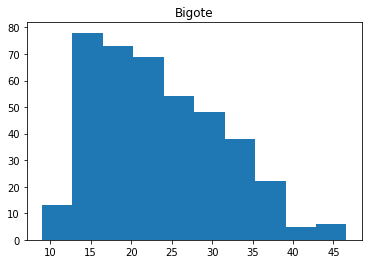

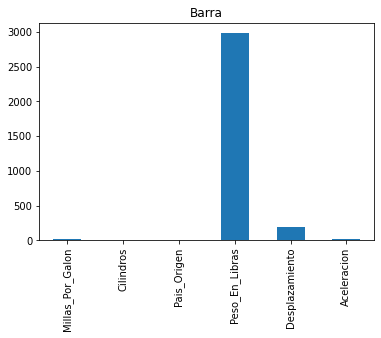

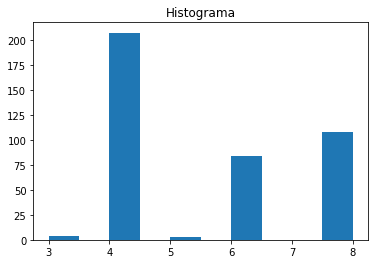

In [ ]:
# Llamo a la función mostrar_graficos
mostrar_graficos(df, 'Millas_Por_Galon', 'Bigote')

datos_medias = {
    "Millas_Por_Galon": [df['Millas_Por_Galon'].mean()],
    "Cilindros": [df['Cilindros'].mean()],
    "Pais_Origen": [df['Pais_Origen'].mean()],
    "Peso_En_Libras": [df['Peso_En_Libras'].mean()],
    "Desplazamiento": [df['Desplazamiento'].mean()],
    "Aceleracion": [df['Aceleracion'].mean()],
}
df_medias = pd.DataFrame(datos_medias)

mostrar_graficos(df_medias, None, 'Barra')

mostrar_graficos(df, 'Cilindros', 'Histograma')

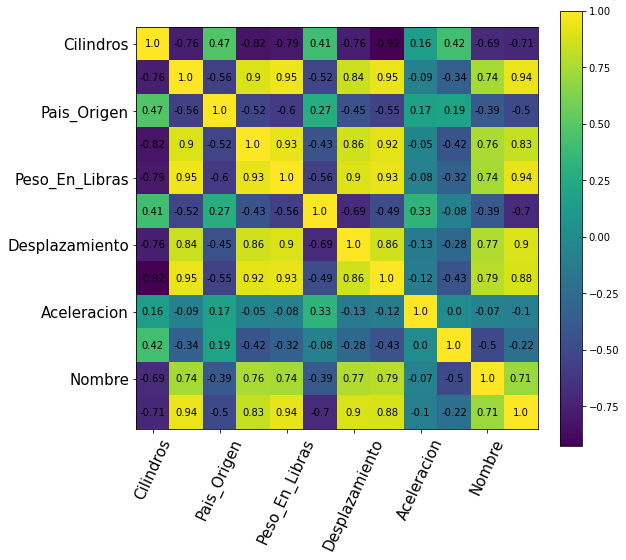

In [ ]:
# genero funcion mapa de calor con las correlaciones del Dataframe
def mapa_de_calor(df):
  corr = df.corr(method='pearson')
  fig, ax = plt.subplots(figsize=(8,8))
  im = ax.imshow(corr, interpolation='nearest')
  fig.colorbar(im, orientation='vertical', fraction = 0.05)

  ax.set_xticklabels(df.columns, rotation=65, fontsize=15)
  ax.set_yticklabels(df.columns, rotation=0, fontsize=15)

  for i in range(len(df.columns)-3):
      for j in range(len(df.columns)-3):
          text = ax.text(j, i, round(corr.to_numpy()[i, j], 2),
                        ha="center", va="center", color="black")

  plt.show()  


mapa_de_calor(df)